# Problem 4 - Logistic Regression with Regularization

## 4.1

**Answer:**

**1. 'C':**

> - *Significance:* This is the inverse regularization strength parameter. It controls the trade-off between allowing the model to increase its complexity as it sees fit with the risk of overfitting.
- *Possible Values:* It can be any positive float. Smaller values specify stronger regularization.
- *In Detail:* A smaller value of C creates a wider margin (stronger regularization), which may lead to underfitting, while a larger value of C creates a narrower margin (weaker regularization), which may lead to overfitting.


---


**2. 'solver':**


> - *Significance:* This parameter specifies the algorithm to use in the optimization problem of finding the parameters that minimize the cost function.
- *Possible Values:*
  - ‘newton-cg’
  - ‘lbfgs’
  - ‘liblinear’
  - ‘sag’
  - ‘saga’
- *In Detail:* Each solver has its own advantages and is suited to different types of data and different problems. For instance, ‘liblinear’ is a good choice for small datasets, while ‘sag’ and ‘saga’ are faster for large ones.


---



**3. 'penalty':**



> - *Significance:* It is used to specify the norm used in the penalization. Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function.
- *Possible Values:*
  - ‘l1’
  - ‘l2’
  - ‘elasticnet’
  - ‘none’
- *In Detail:* ‘l1’ and ‘l2’ are L1 and L2 regularization, respectively. ‘elasticnet’ is a linear combination of L1 and L2 regularization. ‘none’ specifies no regularization.


---


**4. Multi_class:**


> - *Significance:* This parameter determines the approach to be used for handling multiple classes.
- *Possible Values:*
  - ‘auto’
  - ‘ovr’ (one-vs-rest)
  - ‘multinomial’
- *In Detail:* ‘ovr’ trains n_classes one-vs-rest classifiers, ‘multinomial’ minimizes the multinomial loss fit across the entire probability distribution, and ‘auto’ selects ‘ovr’ if the data is binary or if solver=‘liblinear’, and otherwise selects ‘multinomial’.


---





## 4.2

**Answer:**

**L1 Regularization (Lasso):**
- *Penalty*: The ‘l1’ penalty uses the L1 norm of the coefficients, which is the sum of the absolute values of the coefficients.

- *Effect*: It tends to produce sparse models, where only a subset of the most important features are left with non-zero weights, effectively performing feature selection. This can be particularly useful when you have a high dimensional dataset with many features that are not informative.

**L2 Regularization (Ridge):**
- *Penalty*: The ‘l2’ penalty uses the L2 norm of the coefficients, which is the sum of the squares of the coefficients:
- *Effect*: It tends to shrink the coefficients for less important features to be very close to zero but typically not exactly zero, distributing the weights more evenly across all features. This helps in preventing overfitting by penalizing large coefficients.


---

**L1 vs L2 Regularization:**
- L1 can yield sparse models whereas L2 usually only regularizes the feature weights.
- L1 regularization can be more robust to outliers compared to L2 regularization because of its feature selection property.
- L2 tends to perform better when most features influence the output and all features are approximately on the same scale.

## 4.3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

For Penalty: l1, C: 0.0001
Coefficients for Class 0 - Petal Length:  0.0
Coefficients for Class 0 - Petal Width:  0.0
Coefficients for Class 2 - Petal Length:  0.0
Coefficients for Class 2 - Petal Width:  0.0
----------------------------------------
For Penalty: l1, C: 0.001
Coefficients for Class 0 - Petal Length:  0.0
Coefficients for Class 0 - Petal Width:  0.0
Coefficients for Class 2 - Petal Length:  0.0
Coefficients for Class 2 - Petal Width:  0.0
----------------------------------------
For Penalty: l1, C: 0.01
Coefficients for Class 0 - Petal Length:  0.0
Coefficients for Class 0 - Petal Width:  0.0
Coefficients for Class 2 - Petal Length:  0.0
Coefficients for Class 2 - Petal Width:  0.0
----------------------------------------
For Penalty: l1, C: 0.1
Coefficients for Class 0 - Petal Length:  -2.2947951144287506
Coefficients for Class 0 - Petal Width:  0.0
Coefficients for Class 2 - Petal Length:  0.0
Coefficients for Class 2 - Petal Width:  1.7698140204194082
----------------

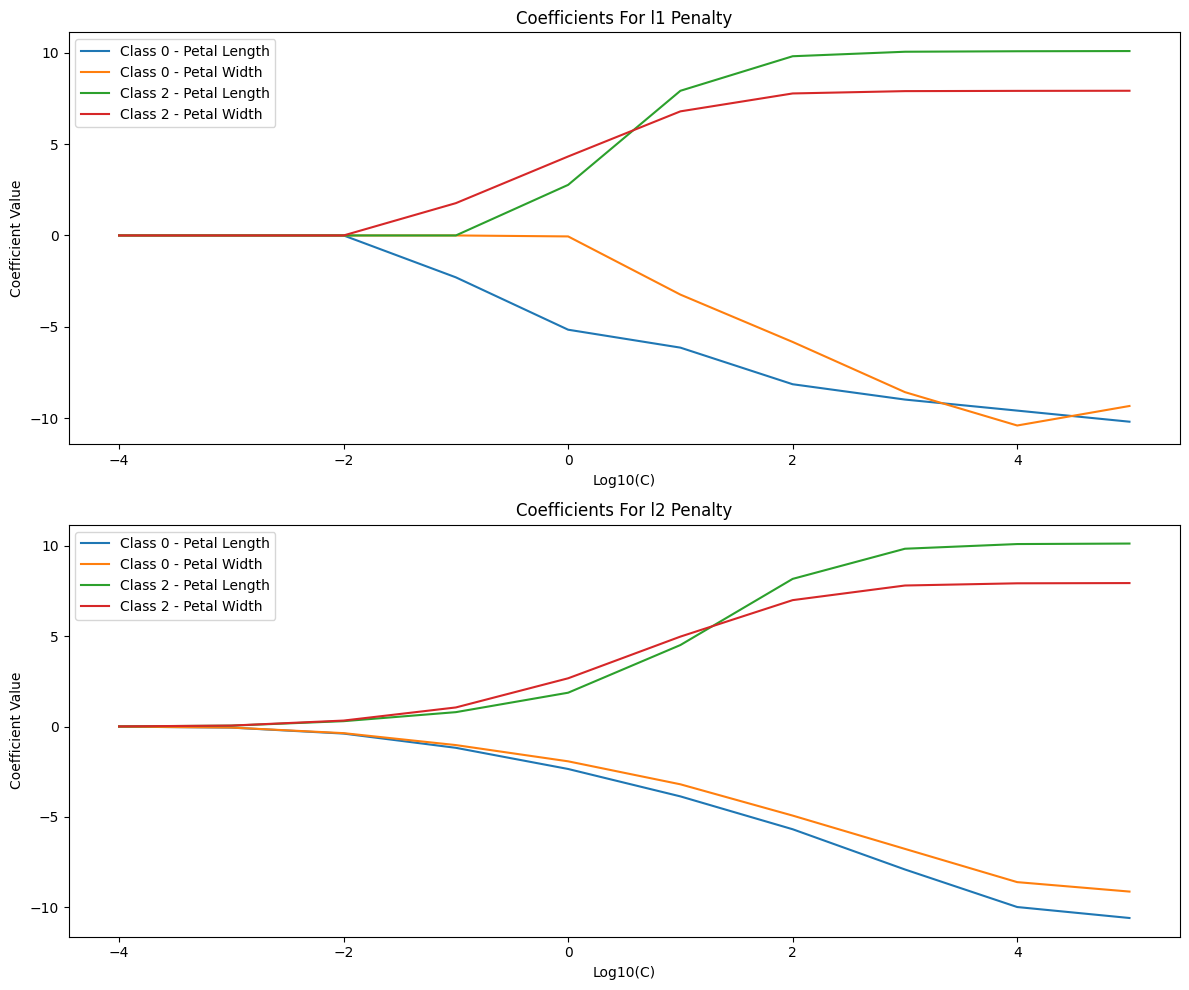

In [4]:
X = iris.data[:, 2:4]  # Petal length and petal width are the 3rd and 4th features
y = iris.target

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the data and transform X
X_scaled = scaler.fit_transform(X)

# Specify the C values and penalties
C_values = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000, 100000]
penalties = ['l1', 'l2']

# To store the coefficients
coefficients = {}


# Fit the models and store the coefficients
for penalty in penalties:
    coefficients[penalty] = []
    for C in C_values:
        model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', multi_class='ovr', max_iter=10000)
        model.fit(X_scaled, y)
        coefficients[penalty].append(model.coef_[[0,2], :])
        # Print out the coefficients
        print(f"For Penalty: {penalty}, C: {C}")
        print("Coefficients for Class 0 - Petal Length: ", model.coef_[0, 0])
        print("Coefficients for Class 0 - Petal Width: ", model.coef_[0, 1])
        print("Coefficients for Class 2 - Petal Length: ", model.coef_[2, 0])
        print("Coefficients for Class 2 - Petal Width: ", model.coef_[2, 1])
        print("----" * 10)

# Plot the coefficients
fig, axes = plt.subplots(2, 1, figsize=(12,10))

for i, penalty in enumerate(penalties):
    ax = axes[i]
    coef_array = np.array(coefficients[penalty])
    ax.plot(np.log10(C_values), coef_array[:, 0, 0], label='Class 0 - Petal Length')
    ax.plot(np.log10(C_values), coef_array[:, 0, 1], label='Class 0 - Petal Width')
    ax.plot(np.log10(C_values), coef_array[:, 1, 0], label='Class 2 - Petal Length')
    ax.plot(np.log10(C_values), coef_array[:, 1, 1], label='Class 2 - Petal Width')
    ax.set_title(f'Coefficients For {penalty} Penalty')
    ax.set_xlabel('Log10(C)')
    ax.set_ylabel('Coefficient Value')
    ax.legend()

plt.tight_layout()
plt.show()

Observation:

As 'C' increases (weaker regularization), the coefficient values of class 0 petal length and width also decreases. Subsequently, the coefficient values of class 2 petal width and length increases as regularization weakens.

Additionally, we can observe that with 'l1' penalty, coefficient values for both classes with 'C' values of, 0.0001, 0.001 and 0.01 equal zero, whereas with 'l2' penalty, the coefficient values get very close to 0, but are never exactly equal to zero.

## 4.4

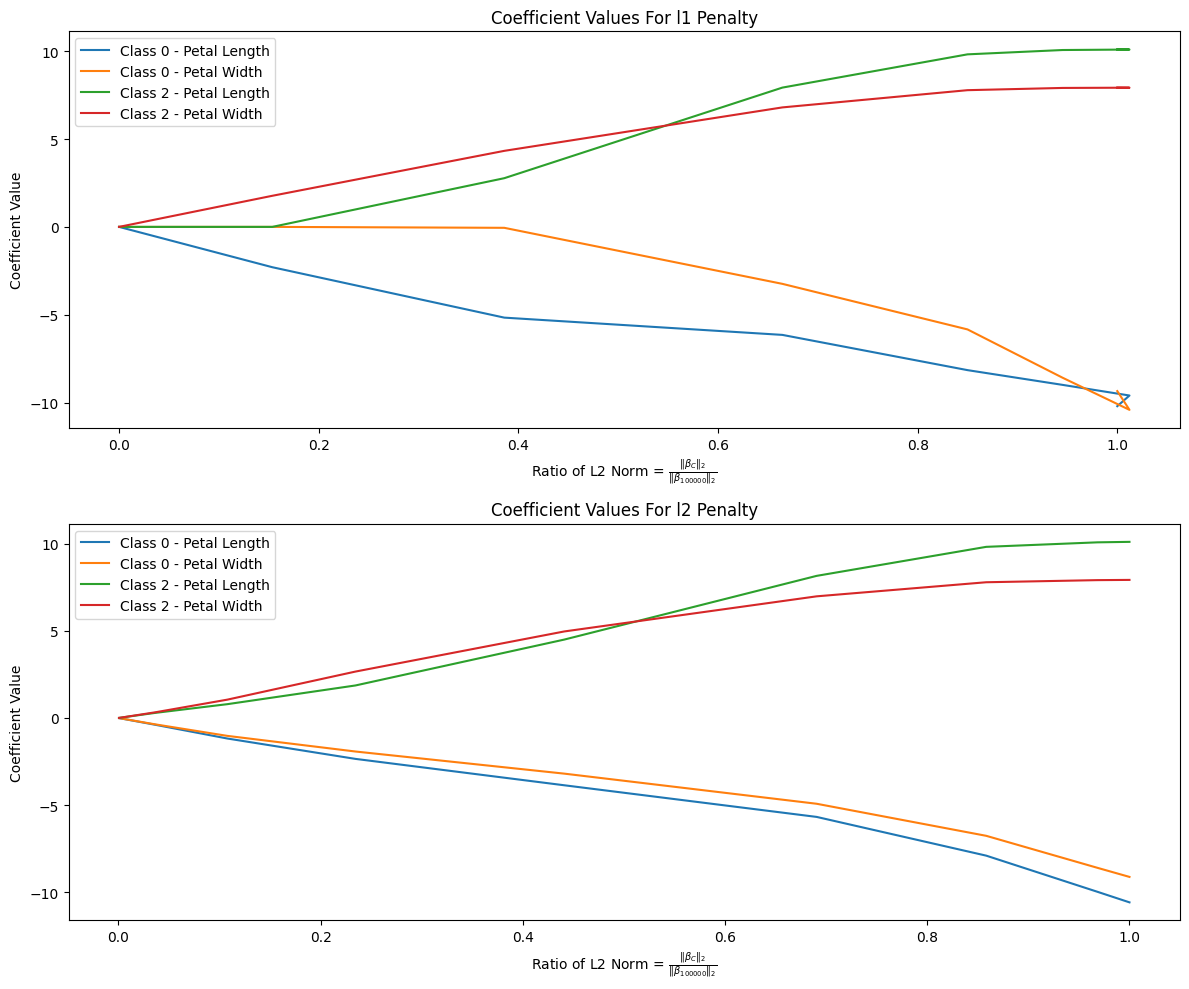

In [7]:
# Calculate the L2 norm ratios and plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for i, penalty in enumerate(penalties):
    ax = axes[i]

    # Extract coefficients for the current penalty
    coef_array = np.array(coefficients[penalty])

    # Calculate the L2 norm of coefficients for C=100000
    beta_100000_norm = np.linalg.norm(coef_array[C_values.index(100000), :, :])

    # Calculate the L2 norm ratios and the coefficients
    ratios = []
    for C in C_values:
        # Calculate L2 norm of the coefficients for the current C and divide by beta_100000_norm
        beta_C_norm = np.linalg.norm(coef_array[C_values.index(C), :, :])
        ratios.append(beta_C_norm / beta_100000_norm)
        # Printing Coefficient values and Ratios
        #print(f"For {penalty} Penalty and C={C}:")
        #print(f"Ratio of L2 Norm: {ratios:.4f}")
        #print(f"Coefficients for Class 0 - Petal Length: {coef_array[C_values.index(C), 0, 0]:.4f}")
        #print(f"Coefficients for Class 0 - Petal Width: {coef_array[C_values.index(C), 0, 1]:.4f}")
        #print(f"Coefficients for Class 2 - Petal Length: {coef_array[C_values.index(C), 1, 0]:.4f}")
        #print(f"Coefficients for Class 2 - Petal Width: {coef_array[C_values.index(C), 1, 1]:.4f}")
        #print("-" * 40)
    # Plot the coefficients against the ratios
    ax.plot(ratios, coef_array[:, 0, 0], label='Class 0 - Petal Length')
    ax.plot(ratios, coef_array[:, 0, 1], label='Class 0 - Petal Width')
    ax.plot(ratios, coef_array[:, 1, 0], label='Class 2 - Petal Length')
    ax.plot(ratios, coef_array[:, 1, 1], label='Class 2 - Petal Width')

    ax.set_title(f'Coefficient Values For {penalty} Penalty')
    ax.set_xlabel(r'Ratio of L2 Norm = $\frac{\| \beta_C \|_2}{\| \beta_{100000} \|_2}$')
    ax.set_ylabel('Coefficient Value')
    ax.legend()

plt.tight_layout()
plt.show()


Observation:

The variability between coefficients for both l1 and l2 penalties are different than the first model, in other words, the rate at which different coefficients shrink towards zero. With 'l2' penalty, the coefficients shrink slower and the lines are smoother than the 'l1' penalty curve. This shows us that the 'l2' penalty is more influential in predicting the target variable.

Additionally, both 'l1' and 'l2'show more stability in their coefficients. With stronger regularization, the coefficients has less variance as the model becomes more generalized, while weker regularization exhibits more fluctuation in the coefficients due to overfitting to the training data.

